---
# Neo4j and NetworkX

---

# <u>Very fast introduction to NetworkX</u>

NetworkX is a Python library for analyzing and manipulating complex data networks. Its aim is to provide advanced functionality for grouping, moving and hierarchically organizing objects in a graph database.

With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

You can use `pip install networkx` to install this package. After thst you may inport NetworkX library:

In [1]:
import networkx as nx

### Creating a graph

Create an empty graph with no nodes and no edges:

In [2]:
g = nx.Graph()
g

By definition, a `Graph` is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g. a text string, an image, an XML object, another Graph, a customized node object, etc. (Note: Python's None object should not be used as a node as it determines whether optional function arguments have been assigned in many functions).

### Nodes

The graph `g` can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. We can get a list of a graph’s nodes: 

In [3]:
g.nodes()

[]

You can add one node at a time

In [4]:
g.add_node(1)
g.nodes()

[1]

add a list of nodes

In [5]:
g.add_nodes_from([2, 3])
g.nodes()

[1, 2, 3]

### Edges

`g` can also be grown by adding one edge at a time

In [6]:
print "Before addition of an edge graph hadn't any edges (edges = {})".format(g.edges())

g.add_edge(1, 2)
g.edges()

Before addition of an edge graph hadn't any edges (edges = [])


[(1, 2)]

and by adding a list of edges

In [7]:
g.add_edges_from([(1, 2),(1, 3)])
g.edges()

[(1, 2), (1, 3)]

One can demolish the graph in a similar fashion; using `Graph.remove_node`, `Graph.remove_nodes_from`, `Graph.remove_edge` and `Graph.remove_edges_from`, e.g.

In [8]:
g.remove_node(2)
g.nodes()

[1, 3]

There are no complaints when adding existing nodes or edges. For example, after removing all nodes and edges,

In [9]:
g.clear()
print 'g.nodes() =', g.nodes()
print 'g.edges() =', g.edges()

g.nodes() = []
g.edges() = []


We add new nodes/edges and NetworkX quietly ignores any that are already present.

In [10]:
g.add_node(1)
g.add_nodes_from(range(2,10,2))   # adds 4 nodes: 2, 4, 6, 8
g.add_node("world")                # adds node "world"
g.add_nodes_from("world")          # adds 5 nodes: 'w', 'o', 'r', 'l', 'd'

# Get nodes amount and display nodes
print "nodes amount =", g.number_of_nodes()
print "nodes:", g.nodes()

nodes amount = 11
nodes: [1, 2, 4, 'd', 6, 8, 'l', 'o', 'r', 'w', 'world']


In [11]:
g.add_edge(1, 2)
g.add_edges_from([(1, 6), (2, 1), (1, 'w'), ('w', 'r'), ('world', 4)])

# Get edges amount and display edges
print "edges amount =", g.number_of_edges()
print "edges:", g.edges()

edges amount = 5
edges: [(1, 2), (1, 'w'), (1, 6), (4, 'world'), ('r', 'w')]


`G.neighbors(n)` returns an iterator of neigboring nodes of `n`

In [12]:
g.neighbors(1)

[2, 'w', 6]

`info(Graph)` function return short data about the Graph

In [13]:
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 11
Number of edges: 5
Average degree:   0.9091


### Simple graph drawing

`draw(Graph)` function draw a graph. To visualize (display) it we can use `matplotlib` Python library. Note, positions of nodes are calculated in random. If you run the above code cell twice the graph form may change. 

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Python27\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


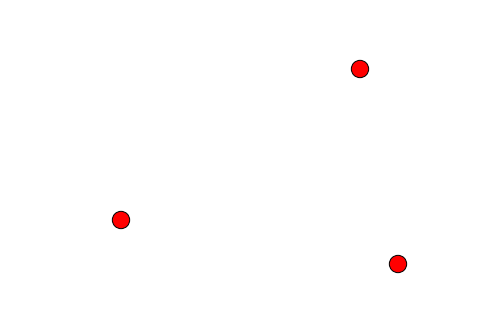

In [15]:
# Create an empty graph
G = nx.Graph()
    
# Add three edges
G.add_node('A');
G.add_node('B');
G.add_node('C');

# Draw the graph
nx.draw(G)

# Show the graph after addition of nodes
plt.show()

C:\Python27\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


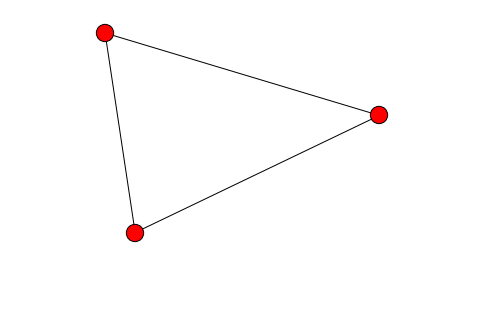

In [16]:
# Create an empty graph
G = nx.Graph()
    
# Add three edges
G.add_edge('A','B');
G.add_edge('B','C');
G.add_edge('C','A');

# Draw the graph
nx.draw(G)

# Show it
plt.show()

We can also add label for nodes

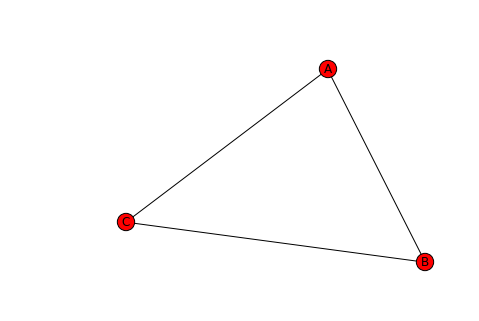

In [17]:
# For above graph
nx.draw(G, with_labels=True)
plt.show()

We can customize node size, nodes and links color node labels in the graph

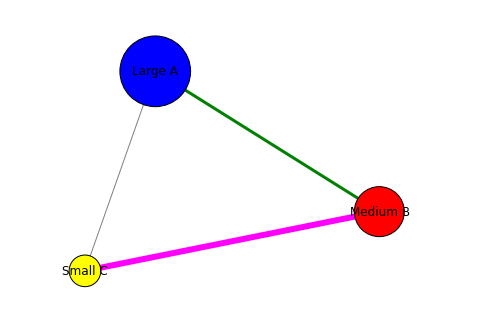

In [18]:
# Set new labels
custom_labels={}
custom_labels['A'] = 'Large A'
custom_labels['B'] = 'Medium B'
custom_labels['C'] = 'Small C'

# Define specific sizes of nodes
custom_node_sizes={}
custom_node_sizes['A'] = 5000
custom_node_sizes['B'] = 2500
custom_node_sizes['C'] = 1000

# Define specific nodes colors
custom_node_color={}
custom_node_color['A'] = 'blue' 
custom_node_color['B'] = 'red' 
custom_node_color['C'] = 'yellow'
    
# Define specific links colors
custom_edge_color={}
custom_edge_color['A','B'] = 'green' 
custom_edge_color['B','C'] = 'magenta'
custom_edge_color['C','A'] = 'grey'

nx.draw(G, 
        with_labels = True,
        labels = custom_labels,  
        node_color = custom_node_color.values(), 
        node_size = custom_node_sizes.values(),  
        edge_color = custom_edge_color.values(),
        # Set edge width
        width = (1,3,6)
       )

plt.show()

### Adding attributes to nodes and edges

Sometimes you may want to attach attributes to either the nodes or edges:

* Perhaps you want to save node properties that will be helpful with future analysis
* Perhaps you want to attach visual descriptions, such a node size, edge width or graph color

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but attributes can be added or changed using add_edge, add_node or direct manipulation of the attribute dictionaries named `G.graph`, `G.node` and `G.edge` for a graph `G`.

[(130, 120), (130, 140), (100, 90), (100, 110), (70, 80), (70, 60), (40, 50), (40, 30), (10, 20), (140, 150), (110, 120), (80, 90), (50, 60), (20, 30)]


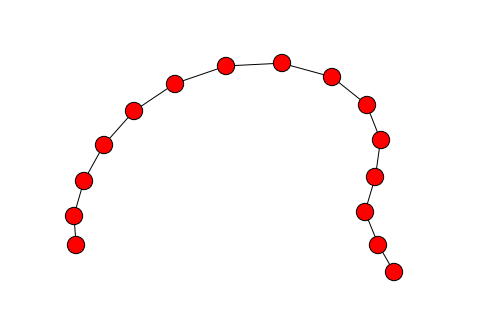

In [19]:
# Let's create a new graph
chain = nx.Graph()

for i in range(1,15):
    chain.add_edge(i*10, (i+1)*10)
    
print chain.edges()
    
nx.draw(chain)
plt.show()

You can safely set the attributes of an edge using subscript notation if the edge already exists.

In [20]:
print "Node 10 properties:", chain.node[10]
# Pay attention how the relationships with other nodes are defined
print "Node 30 properties:", chain.node[30]
print "Properties of edge (10, 20):", chain[10][20]
print "Properties of edge (40, 50):", chain[40][50]

Node 10 properties: {}
Node 30 properties: {}
Properties of edge (10, 20): {}
Properties of edge (40, 50): {}


In [21]:
# Add some properties to node 10
chain.node[10]['name'] = 'Main node'
chain.node[10]['color'] = 'green'

# and color for edge between 40 and 50 nodes 
chain[40][50]['color'] = 'blue'

# Display changes
print "Node 10 properties:", chain.node[10]
print "Node 30 properties:", chain.node[30]
print "Properties of edge (10, 20):", chain[10][20]
print "Properties of edge (40, 50):", chain[40][50]

Node 10 properties: {'color': 'green', 'name': 'Main node'}
Node 30 properties: {}
Properties of edge (10, 20): {}
Properties of edge (40, 50): {'color': 'blue'}


In [22]:
names = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 
         'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen']

# Add/update 'name' property for nodes
for node in chain.nodes():
    chain.node[node]['name'] = names[node//10 - 1]

# Add 'weight' property for edges    
for node in range(10, 150, 10):
    chain[node][node + 10]['weight'] = float(len(names[node//10 - 1]))
    
print "Nodes:"
for node in chain.nodes():
    print node, chain[node]
    
print "\nEdges:"
chain.edges(data=True)

Nodes:
130 {120: {'weight': 6.0}, 140: {'weight': 8.0}}
100 {90: {'weight': 4.0}, 110: {'weight': 3.0}}
70 {80: {'weight': 5.0}, 60: {'weight': 3.0}}
40 {50: {'color': 'blue', 'weight': 4.0}, 30: {'weight': 5.0}}
10 {20: {'weight': 3.0}}
140 {130: {'weight': 8.0}, 150: {'weight': 8.0}}
110 {120: {'weight': 6.0}, 100: {'weight': 3.0}}
80 {90: {'weight': 5.0}, 70: {'weight': 5.0}}
50 {40: {'color': 'blue', 'weight': 4.0}, 60: {'weight': 4.0}}
20 {10: {'weight': 3.0}, 30: {'weight': 3.0}}
150 {140: {'weight': 8.0}}
120 {130: {'weight': 6.0}, 110: {'weight': 6.0}}
90 {80: {'weight': 5.0}, 100: {'weight': 4.0}}
60 {50: {'weight': 4.0}, 70: {'weight': 3.0}}
30 {40: {'weight': 5.0}, 20: {'weight': 3.0}}

Edges:


[(130, 120, {'weight': 6.0}),
 (130, 140, {'weight': 8.0}),
 (100, 90, {'weight': 4.0}),
 (100, 110, {'weight': 3.0}),
 (70, 80, {'weight': 5.0}),
 (70, 60, {'weight': 3.0}),
 (40, 50, {'color': 'blue', 'weight': 4.0}),
 (40, 30, {'weight': 5.0}),
 (10, 20, {'weight': 3.0}),
 (140, 150, {'weight': 8.0}),
 (110, 120, {'weight': 6.0}),
 (80, 90, {'weight': 5.0}),
 (50, 60, {'weight': 4.0}),
 (20, 30, {'weight': 3.0})]

NetworkX provides a few various algorithms for calculation of nodes positions. It would be better to show how them looks for the above graph `chain`: 

C:\Python27\lib\site-packages\matplotlib\text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
C:\Python27\lib\site-packages\matplotlib\text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


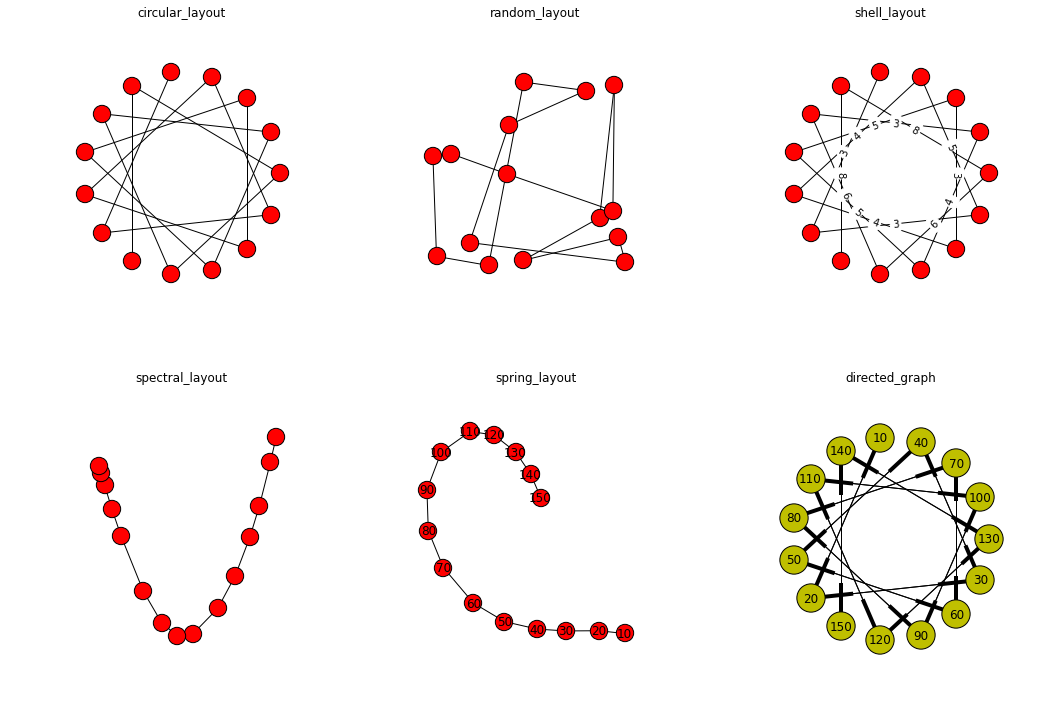

In [23]:
# Set plot size
plt.rcParams['figure.figsize'] = (18, 12)

# Divide plot into 2 x 3 subplot body
plt.subplot(2, 3, 1)
# Position nodes on a circle.
pos = nx.circular_layout(chain)
# Draw nodes at defined positions
nx.draw_networkx_nodes(chain, pos)
nx.draw_networkx_edges(chain, pos)
plt.title('circular_layout')
plt.axis('off')

plt.subplot(2, 3, 2)
# Position nodes uniformly at random in the unit square.
pos = nx.random_layout(chain)
nx.draw_networkx_nodes(chain, pos)
nx.draw_networkx_edges(chain, pos)
plt.title('random_layout')
plt.axis('off')

plt.subplot(2, 3, 3)
# Position nodes in concentric circles.
pos = nx.shell_layout(chain)
nx.draw_networkx_nodes(chain, pos)
nx.draw_networkx_edges(chain, pos)
# Add label to egdes
edge_weight = dict([ ( (u, v), int(d['weight']) ) for u,v,d in chain.edges(data=True) ])
nx.draw_networkx_edge_labels(chain, pos, edge_labels=edge_weight)
plt.title('shell_layout')
plt.axis('off')

plt.subplot(2, 3, 4)
# Position nodes using the eigenvectors of the graph Laplacian.
pos = nx.spectral_layout(chain)
nx.draw_networkx_nodes(chain, pos)
nx.draw_networkx_edges(chain, pos)
plt.title('spectral_layout')
plt.axis('off')

plt.subplot(2, 3, 5)
# Position nodes using Fruchterman-Reingold force-directed algorithm.
pos = nx.spring_layout(chain)
nx.draw_networkx_nodes(chain, pos)
nx.draw_networkx_edges(chain, pos)
# Add label to nodes
nx.draw_networkx_labels(chain,pos)
plt.title('spring_layout')
plt.axis('off')

plt.subplot(2, 3, 6)
# Directed graph
H = chain.to_directed()
pos = nx.circular_layout(chain)
nx.draw(H, pos, node_color='y', node_size=800)
nx.draw_networkx_labels(chain, pos)
plt.title('directed_graph')
plt.axis('off')

# Save graph as image in PNG format
plt.savefig("graph_set.png")
plt.show()

Using `matplotlib` tools we can easily place specific image instead of the node. We will display the following picture:

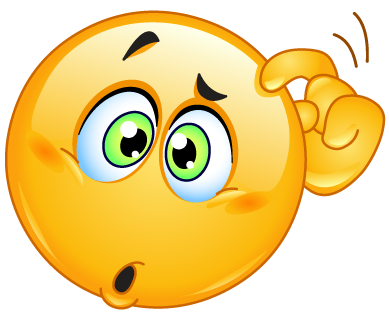

In [24]:
from IPython.display import Image

Image("http://1.bp.blogspot.com/-RP6Rv-x72Z0/T_5a4VferNI/AAAAAAAAAtI/YJ6oy7TGv1E/s1600/lost_emoticon.png")

The same picture can be displayed using `matplotlib` in the way:

Image size: (389, 321)


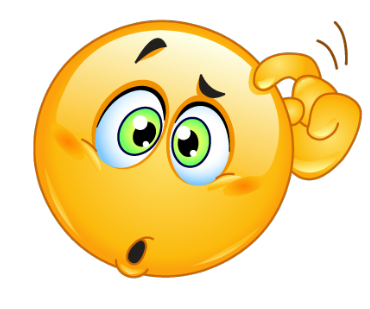

In [26]:
import urllib 
from cStringIO import StringIO 
from PIL import Image

# Read image data
f = StringIO(urllib.urlopen("http://1.bp.blogspot.com/-RP6Rv-x72Z0/T_5a4VferNI/AAAAAAAAAtI/YJ6oy7TGv1E/s1600/lost_emoticon.png").read())
# Create a new Image object
img = Image.open(f)
# Define image width and height
print "Image size:", img.size

# Set plot size
plt.rcParams['figure.figsize'] = (6, 6)
# Draw image
plt.axis('off')  # Hide axis
fig = plt.figure(1)
ax = plt.subplot(111)
ax.imshow(img)
plt.show()

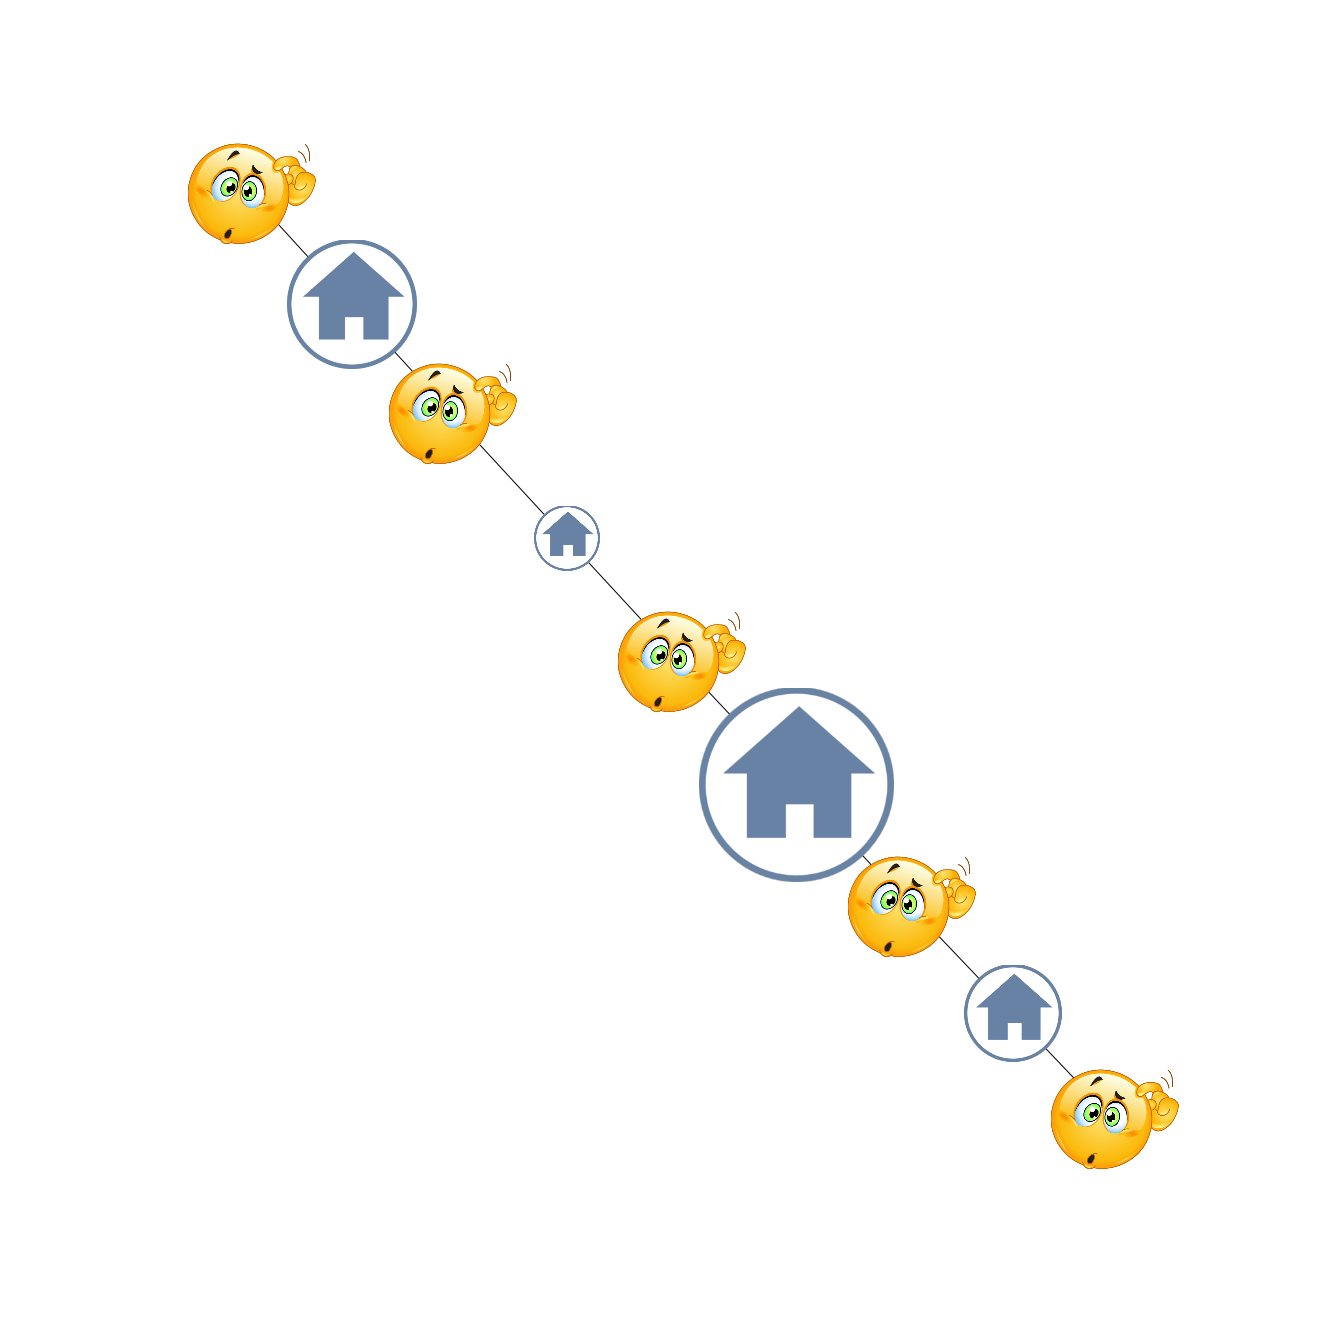

In [29]:
# Create the image which we will place in the middle of each edge
f_edge = StringIO(urllib.urlopen('http://www.clker.com/cliparts/V/T/2/h/s/b/home-logo-md.png').read())
img_edge = Image.open(f_edge)

# Create the image wich we will place instead of node
f_node = StringIO(urllib.urlopen("http://1.bp.blogspot.com/-RP6Rv-x72Z0/T_5a4VferNI/AAAAAAAAAtI/YJ6oy7TGv1E/s1600/lost_emoticon.png").read())
img_node = Image.open(f_node)


# Draw graph without images
G = nx.Graph()
G.add_edge(0, 1, image=img_edge, size=0.1)
G.add_edge(1, 2, image=img_edge, size=0.05)
G.add_edge(2, 3, image=img_edge, size=0.15)
G.add_edge(3, 4, image=img_edge, size=0.075)

pos = nx.spring_layout(G)
nx.draw(G, pos)

# Add images on edges
ax = plt.gca()
fig = plt.gcf()
# Define edge image position (middle of edge, halfway between nodes)
label_pos = 0.5  
trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform
for n1, n2 in G.edges():
    # Define x, y coordiantes of both start and end nodes
    x1, y1 = pos[n1]
    x2, y2 = pos[n2]
    x = x1 * label_pos + x2 * (1.0 - label_pos)
    y = y1 * label_pos + y2 * (1.0 - label_pos)
    xx, yy = trans((x,y))          # Figure coordinates
    xa, ya = trans2((xx,yy))       # Axes coordinates
    img_size = G[n1][n2]['size']   # Read the image size
    img = G[n1][n2]['image']       # Read the image
    a = plt.axes([xa-img_size/2.0, ya-img_size/2.0, img_size, img_size])
    a.imshow(img) 
    a.set_aspect('equal')
    a.axis('off')
    
# Add images on nodes
for node in G.nodes():
    # Define x, y coordiantes of the node `node`
    x, y = pos[node]
    xx, yy = trans((x,y))          # Figure coordinates
    xa, ya = trans2((xx,yy))       # Axes coordinates
    img_size = 0.1                 # Set the image size
    a = plt.axes([xa-img_size/2.0, ya-img_size/2.0, img_size, img_size])
    a.imshow(img_node) 
    a.set_aspect('equal')
    a.axis('off')

# Set plot size
plt.rcParams['figure.figsize'] = (18, 18)
plt.show()

# <u>NetworkX using for Neo4j graphs visualization</u> 

We can use NetworkX Python library for visualizing of Neo4j database.

Let's connect to the database with IMDB data, with we have created earlier

In [30]:
from py2neo import authenticate, Graph, Node, Relationship

# Set up authentication parameters
authenticate("localhost:7474", "neo4j", "130191")

# Connect to authenticated graph database
try:
    graph = Graph()
    print "Connected successfully!"
except: 
    print "Something went wrong."

# Open Neo4j browser
graph.open_browser()

Connected successfully!


Look at the total nodes amount (for movies, directors and actors) 

In [31]:
print graph.cypher.execute("MATCH (n) RETURN count(n) AS amount")

   | amount
---+--------
 1 |   3952



And display also various characterictics of the network using `py2neo`

In [32]:
print "Relationships amount:", graph.size

print "\nRelationships types:", graph.relationship_types

print "\nNodes amount:", graph.order

print "\nExisting Labels:", graph.node_labels

print "\nInfo about Node with id = 0:"
print graph.node(0)

print "\nThe number of relationships attached to the node with id = 0:", graph.node(0).degree

print "\nProperties and Labels of the node with id = 0:"
print "Labels:", graph.node(0).labels
print "Properties", graph.node(0).properties.keys()

Relationships amount: 6076

Relationships types: frozenset([u'DIRECTED', u'ACTED_IN'])

Nodes amount: 3952

Existing Labels: frozenset([u'Director', u'Movie', u'Actor'])

Info about Node with id = 0:
(n0:Movie {description:"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",genres:["Crime","Drama"],rating:"9.3",released:"1994",runtime:"142",title:"The Shawshank Redemption"})

The number of relationships attached to the node with id = 0: 4

Properties and Labels of the node with id = 0:
Labels: LabelSet([u'Movie'])
Properties [u'rating', u'genres', u'description', u'title', u'released', u'runtime']


By default the printed results have not a pretty view. We can use pandas DataFrames for print queris results in the forms of tables: 

In [33]:
import pandas as pd

# DataFrame with movies data
data = graph.cypher.execute("MATCH (n:Movie) RETURN n.title, n.released, n.rating, n.genres, n.runtime")
df = pd.DataFrame(data=data.records, columns=data.columns)
df.head(10)

,n.title,n.released,n.rating,n.genres,n.runtime
0,The Shawshank Redemption,1994,9.3,"[Crime, Drama]",142
1,The Dark Knight,2008,9.0,"[Action, Crime, Drama]",152
2,Inception,2010,8.8,"[Action, Mystery, Sci-Fi, Thriller]",148
3,Fight Club,1999,8.9,[Drama],139
4,Pulp Fiction,1994,8.9,"[Crime, Drama]",154
5,Forrest Gump,1994,8.8,"[Drama, Romance]",142
6,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,"[Adventure, Drama, Fantasy]",178
7,The Matrix,1999,8.7,"[Action, Sci-Fi]",136
8,The Lord of the Rings: The Return of the King,2003,8.9,"[Adventure, Drama, Fantasy]",201
9,The Godfather,1972,9.2,"[Crime, Drama]",175


In [34]:
# DataFrame with actors data
data = graph.cypher.execute("MATCH (n:Actor) RETURN n.name, n.born, n.died, n.image_url")
df = pd.DataFrame(data=data.records, columns=data.columns)
df.head(10)

,n.name,n.born,n.died,n.image_url
0,Tim Robbins,1958-10-16,,http://ia.media-imdb.com/images/M/MV5BMTI1OTYx...
1,Morgan Freeman,1937-6-1,,http://ia.media-imdb.com/images/M/MV5BMTc0MDMy...
2,Bob Gunton,1945-11-15,,http://ia.media-imdb.com/images/M/MV5BMTc3MzY0...
3,Christian Bale,1974-1-30,,http://ia.media-imdb.com/images/M/MV5BMTIzMzAw...
4,Heath Ledger,1979-4-4,2008-1-22,http://ia.media-imdb.com/images/M/MV5BMTI2NTY0...
5,Aaron Eckhart,1968-3-12,,http://ia.media-imdb.com/images/M/MV5BMTc4MTAy...
6,Leonardo DiCaprio,1974-11-11,,http://ia.media-imdb.com/images/M/MV5BMTgzMDc3...
7,Joseph Gordon-Levitt,1981-2-17,,http://ia.media-imdb.com/images/M/MV5BMTQzOTg0...
8,Ellen Page,1987-2-21,,http://ia.media-imdb.com/images/M/MV5BMTU3MzM3...
9,Brad Pitt,1963-12-18,,http://ia.media-imdb.com/images/M/MV5BMjA1MjE2...


In [35]:
# This function helps to obtain nodes identifier.
# We select the "title" (for movie) or "name" (for actor or director) attribute as an identifier 
def get_node_name(node):
    name = node['name']
    if name is None:
        name = node['title']
    return name

# This function transfer query data to py2neo graph 
def get_graph(data, directed=True):
    '''
    Query example:
    data = graph.cypher.execute("MATCH (n)-[r]->() RETURN n, r")
    '''
    # Select between directed and simple graphs
    if directed:
        graph = nx.DiGraph()
    else:
        graph = nx.Graph()
        
    # We will remember which nodes we have already considered to avoid repetitions
    written_nodes = []
    written_edges = []
    for item in data:
        # Write nodes
        node = item.n  # Current node
        rel = item.r   # Current relationship
        
        name = get_node_name(node)
        if name not in written_nodes and name is not None:
            written_nodes.append(name)
            properties = {}
            # Remove name from the properties list
            for key, val in node.properties.iteritems():
                if key != 'name' or key != 'title':
                    properties[key] = val
            # Add the current node to the graph
            graph.add_node(name, properties, label=str(node.labels).split("[u'")[1].split("']")[0])
        
        # Write relationships
        # Define start node
        startNode_name = get_node_name(rel.nodes[0])
        # Define end node
        endNode_name = get_node_name(rel.nodes[1])
        if (startNode_name, endNode_name) not in written_edges and startNode_name is not None and endNode_name is not None:
            written_edges.append((startNode_name, endNode_name))
            # Add the current relationship to the graph
            graph.add_edge(startNode_name, endNode_name, rel.properties, type=rel.type)
    return graph

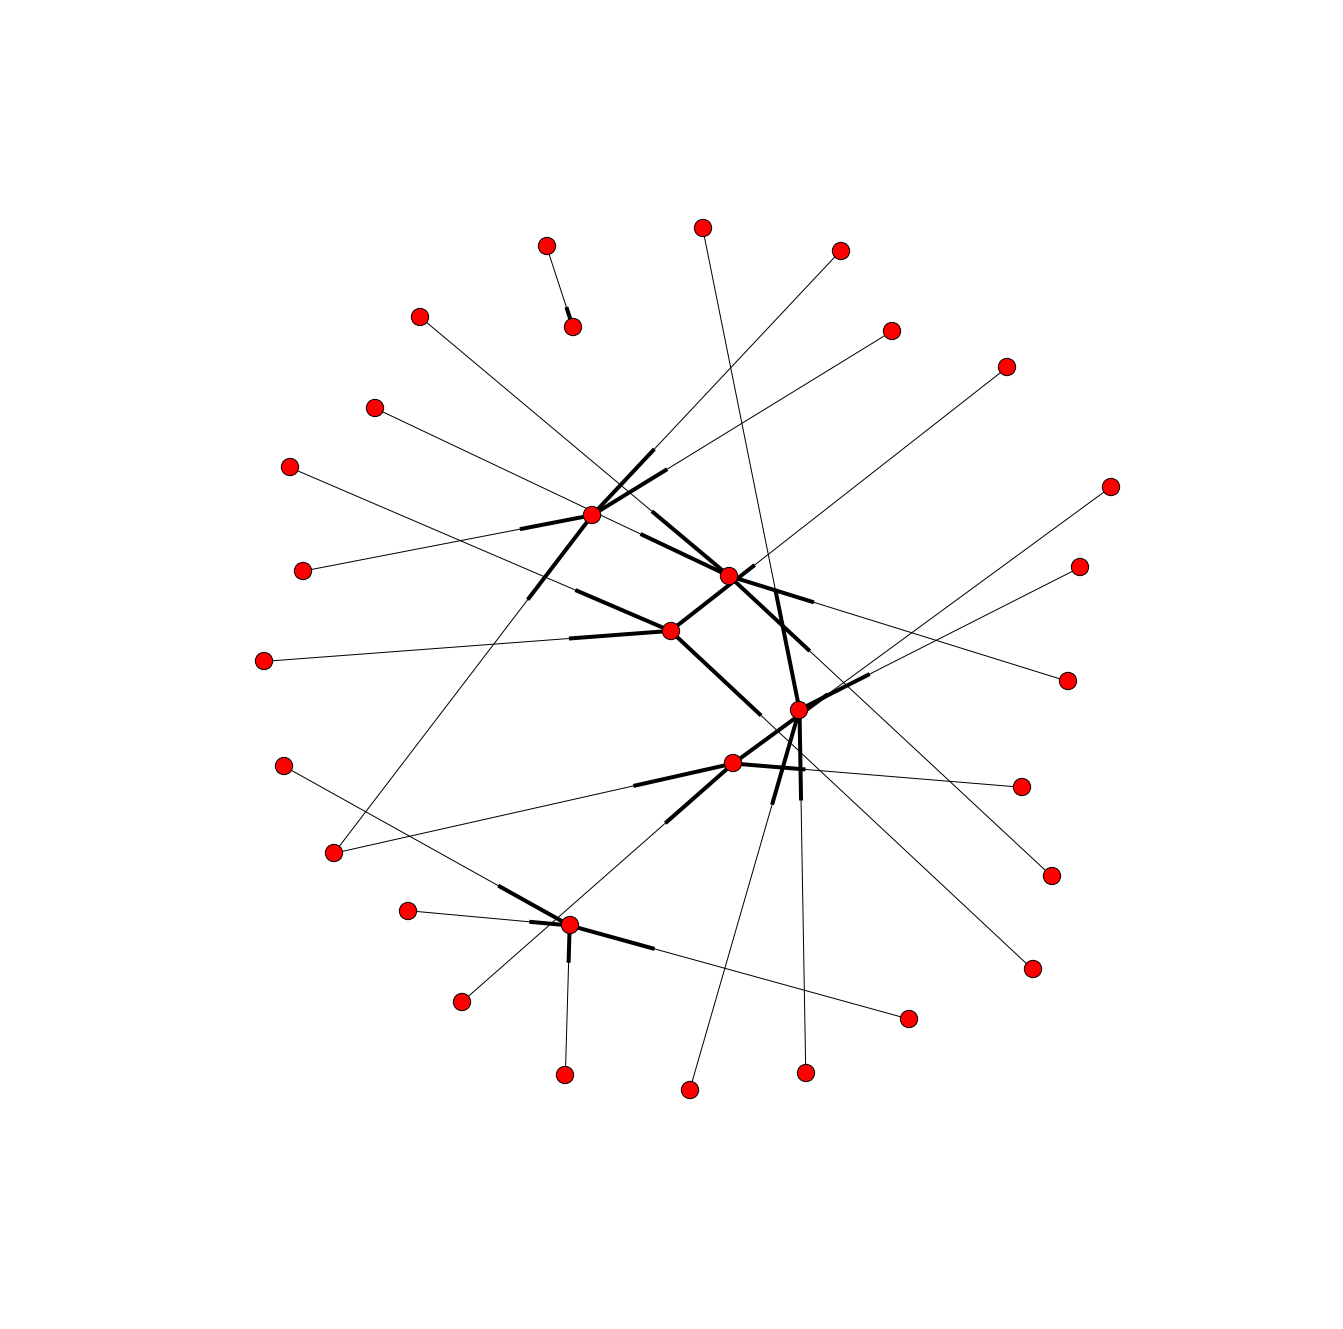

In [36]:
# Set plot size
plt.rcParams['figure.figsize'] = (18, 18)

# Display the network only for the first 25 nodes from the Neo4j database
data = graph.cypher.execute("MATCH (n)-[r]->() RETURN n, r LIMIT 25")
g = get_graph(data)

nx.draw(g, pos=nx.spring_layout(g))
plt.show()

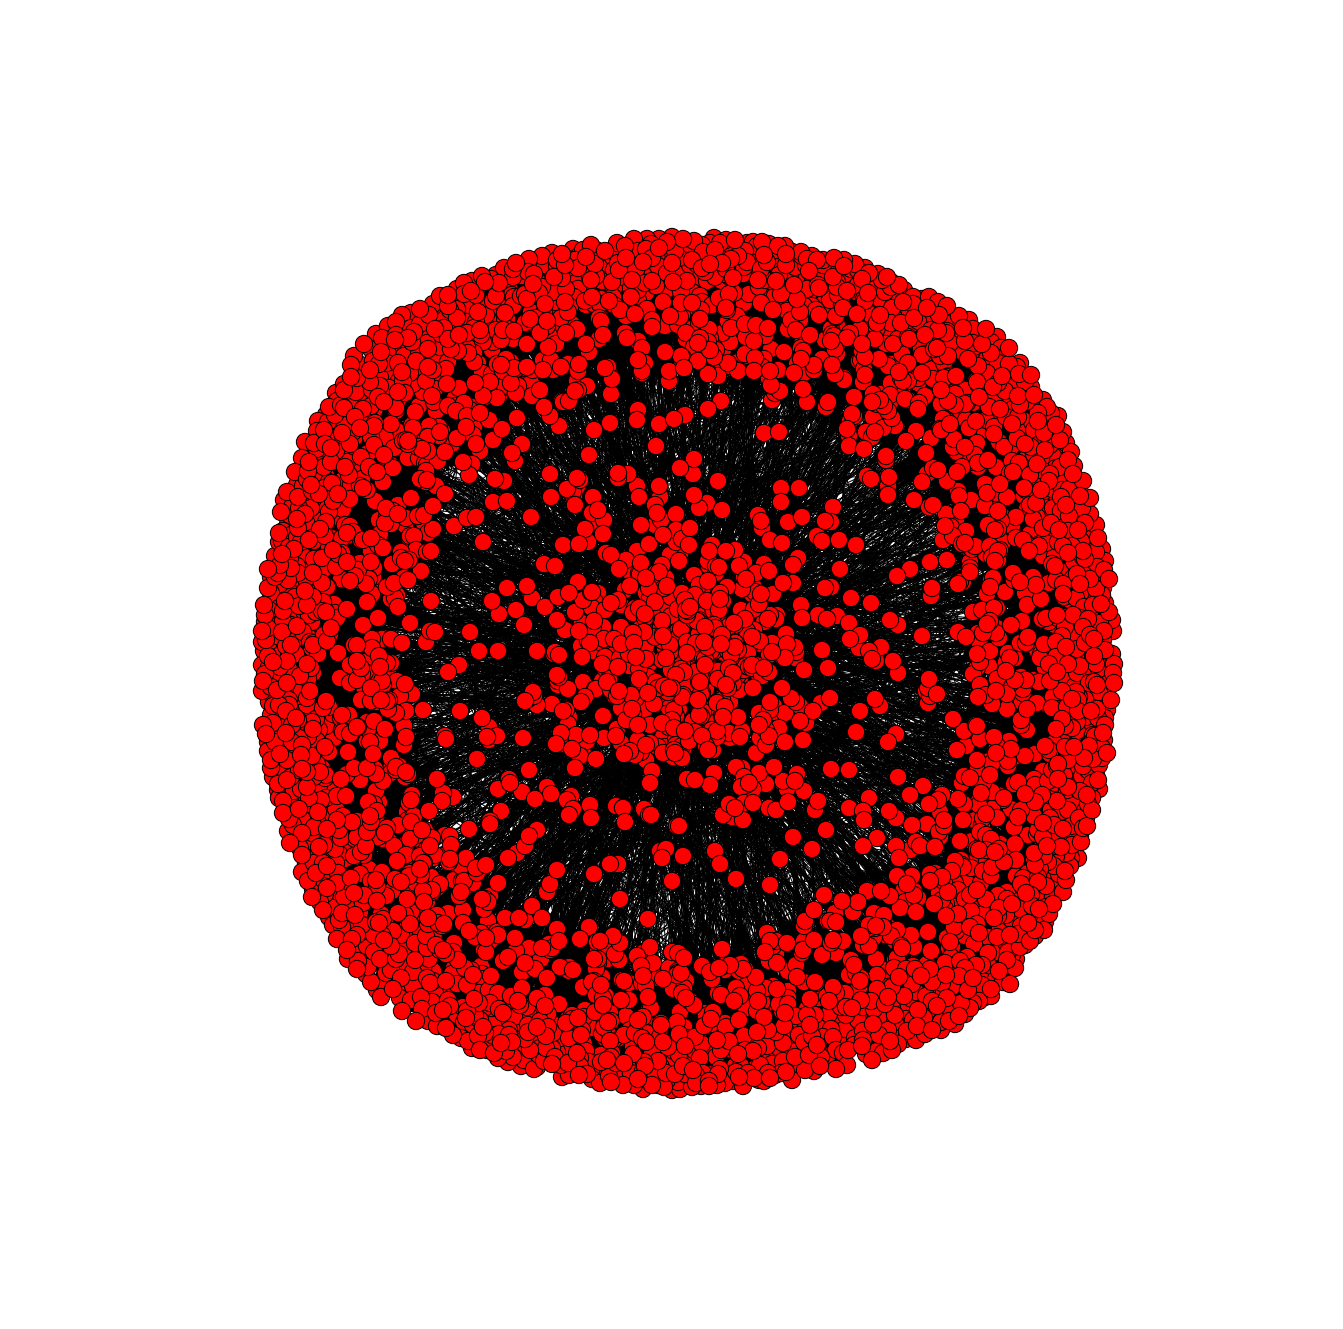

In [37]:
# Display the network for all available nodes
data = graph.cypher.execute("MATCH (n)-[r]->() RETURN n, r")
g = get_graph(data)

nx.draw(g, pos=nx.spring_layout(g))
plt.show()

Of course, NetworkX cannot visualize nicely thus large graph. Let's prettify the graph with 25 nodes with colored nodes of various sizes and nodes and edges labels

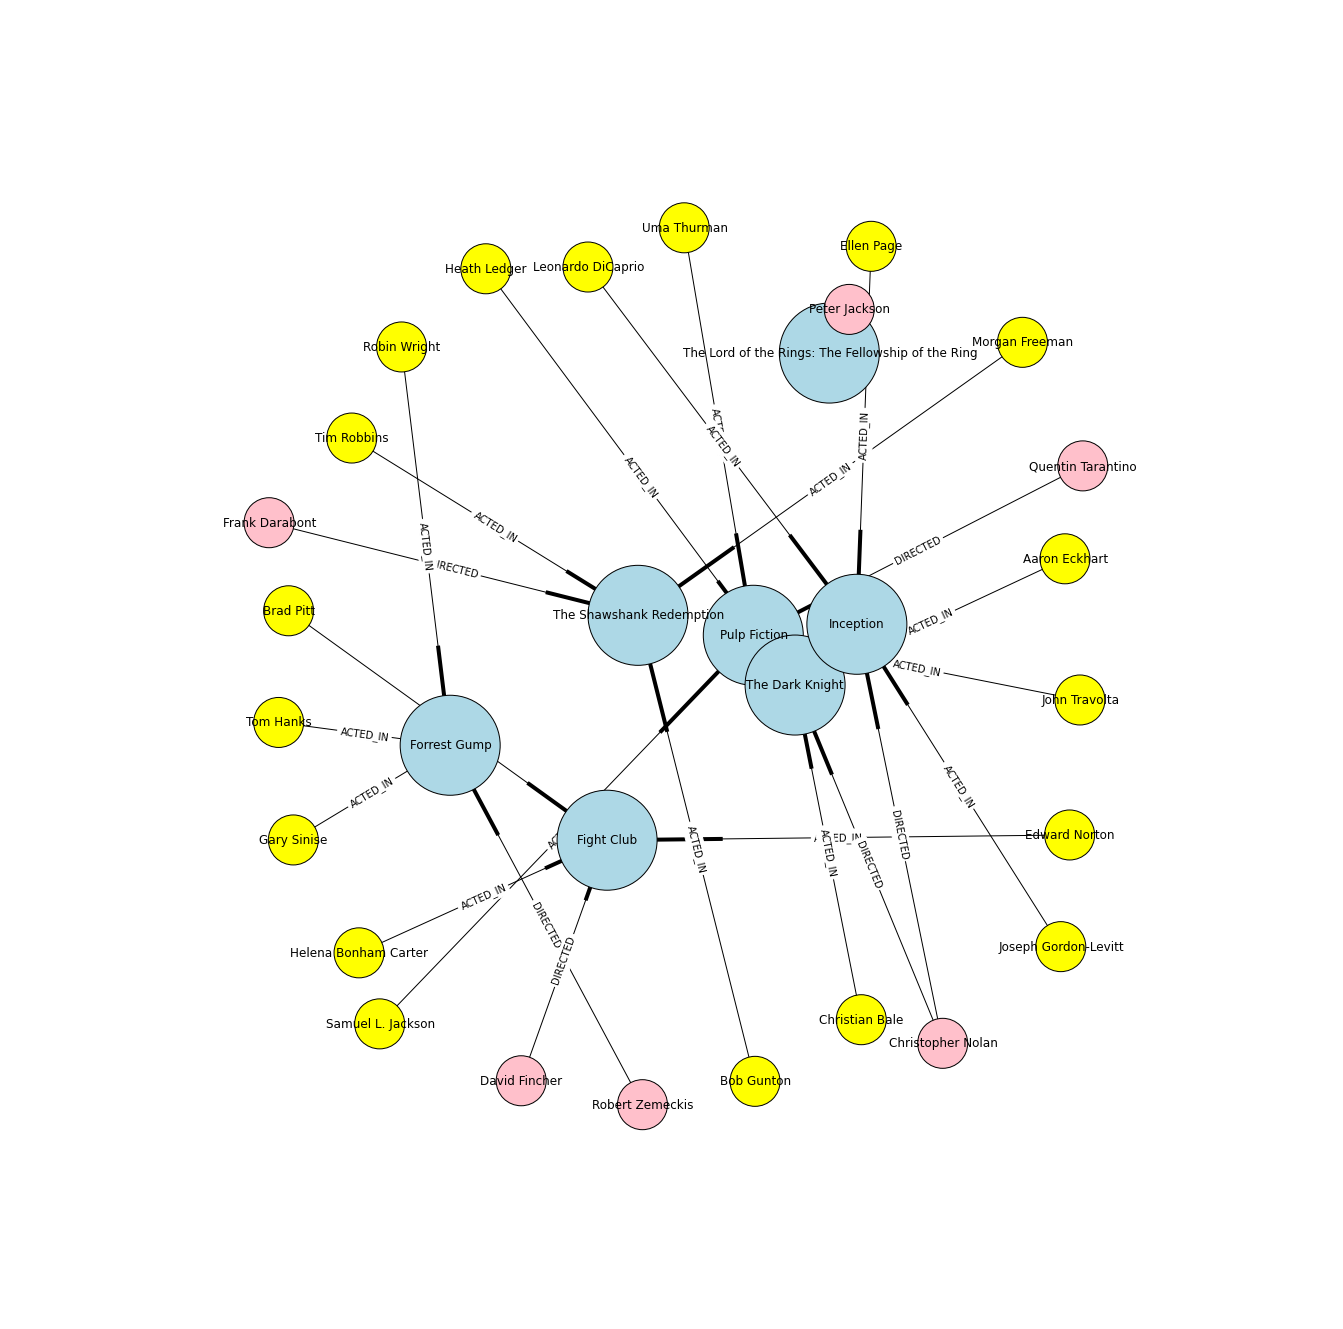

In [39]:
# Construct the dict of nodes labels
labels = {}
for i in g.nodes():
    labels.update({i: i})

# Define specific sizes of nodes
size_labels = []
for i in g.nodes(data=True):
    if 'label' in i[1].keys():
        if i[1]['label'] == 'Actor' or i[1]['label'] == 'Director':
            size_labels.append(2500)
    else:        
        size_labels.append(10000)

# Define specific nodes colors
color_labels = []
for i in g.nodes(data=True):
    if 'label' in i[1].keys():
        if i[1]['label'] == 'Actor':
            color_labels.append('yellow')
        elif i[1]['label'] == 'Director':
            color_labels.append('pink')
    else:        
        color_labels.append('lightblue')

data = graph.cypher.execute("MATCH (n)-[r]->() RETURN n, r LIMIT 25")
g = get_graph(data, directed=True)
pos = nx.spring_layout(g)

nx.draw(g, 
        pos, 
        with_labels = True,
        labels = labels,  
        node_color = color_labels, 
        node_size = size_labels,  
        )

edge_labels = dict([ ( (u, v), d['type'] ) for u,v,d in g.edges(data=True) ])
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)

plt.show()

---
> ### Exersice:
> 
> **1.** The "image_url" of each actor's and director's node contains the link to the photo of this person. Based on the above examples, for the last graph draw the photo instead of circle node for each actor and director (only image without text labels). The movie's nodes remain without any changes.

> **2.** Using Cypher syntax find the subgraph for the actor whose was acted in the largest amount of movies from the database (sign it as `X`). This subgraph should contain all movies with all persons. Display results like in the last example, but add the released year to the movie title. Fill `X` node with green color and make it the largest in size. 

> **3.** A centrality measure is a fundamental graph analytic that provides insight into the relative importance of a particular node in a graph. Let’s consider the following centrality measures for this graph:

> <img src='images/graph.png'>

> **Degree centrality:**
>> The degree centrality of a node in the graph is a measure of the number of incident edges upon it. Think of this centrality measure as a way of tabulating the frequency of incident edges on nodes for the purpose of measuring uniformity among them, finding the nodes with the highest or lowest numbers of incident edges, or otherwise trying to discover patterns that provide insight into the network topology based on number of connections as a primary motivation. The degree centrality of a node is just one facet that is useful in reasoning about its role in a network, and it provides a good starting point for identifying outliers or anomalies with respect to connectedness relative to other nodes in the graph. In aggregate, the average degree centrality tells us something about the density of an overall graph. 

> The degree centrality $C_d(n)$ of a node $n$ is defined as the number of links incident upon a node (i.e., the number of ties that a node has) and is computed as follows:
> $$C_c(n) = \sum R(n) / (N-1),$$
where $R(n)$ is the amount of nodes connected with node $n$, $N$ is the total nodes amount in the graph. 
> <br></br>For example, the degree centrality of all nodes in figure above is computed as follows:

>|Node|Connected with|Relationships amount|Degree centrality|
 |-----|-----|-----|----|
 |a|b|1|1/4|
 |b|a, c, d|3|3/4|
 |c|b, e|2|1/2|
 |d|b, e|2|1/2|
 |3|c, d|2|1/2|

> NetworkX provides [`networkx.degree_centrality(graph)`](https://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.centrality.degree_centrality.html) as a built-in function to compute the degree centrality of a graph. It returns a dictionary that maps the ID of each node to its degree centrality.

> **Betweenness centrality:**
>> The betweenness centrality of a node is a measure of how often it connects any other nodes in the graph in the sense of being in between other nodes. You might think about betweenness centrality as a measure of how critical a node is in connecting other nodes as a broker or gateway. Although not necessarily the case, the loss of nodes with a high betweenness centrality measure could be quite disruptive to the flow of energy in a graph, and in some circumstances removing nodes with high betweenness centrality can disintegrate a graph into smaller subgraphs. 

> The betweenness centrality $C_b(n)$ of a node $n$ is computed as follows:
> $$C_b(n) = \sum_{s\ne n \ne t}\left(\sigma_{st}(n) / \sigma_{st}\right),$$
where $s$ and $t$ are nodes in the network different from $n$, $\sigma_{st}$ denotes the number of shortest paths from $s$ to $t$, and $\sigma_{st}(n)$ is the number of shortest paths from $s$ to $t$ that $n$ lies on.
> <br></br>For example, the betweenness centrality of node `b` in figure above is computed as follows:
> 
> \begin{equation}
\begin{split}
C_b(5) & = \left\{
\left(\sigma_{ac}(b) / \sigma_{ac}\right) + 
\left(\sigma_{ad}(b) / \sigma_{ad}\right) + 
\left(\sigma_{ae}(b) / \sigma_{ae}\right) + 
\left(\sigma_{cd}(b) / \sigma_{cd}\right) + 
\left(\sigma_{ce}(b) / \sigma_{ce}\right) + 
\left(\sigma_{de}(b) / \sigma_{de}\right) 
\right\} / 6\\
& = \left\{(1 / 1) + (1 / 1) + (2 / 2) + (1 / 2) + 0 + 0 \right\} / 6 = 3.5 / 6 ≈ 0.583
\end{split}
\end{equation}

> NetworkX provides [`networkx.betweenness_centrality(graph)`](https://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.bipartite.centrality.betweenness_centrality.html) as a built-in function to compute the betweenness centrality of a graph. It returns a dictionary that maps the ID of each node to its betweenness centrality.

> **Closeness centrality:**
>> The closeness centrality of a node is a measure of how highly connected (“close”) it is to all other nodes in the graph. This centrality measure is also predicated on the notion of shortest paths in the graph and offers insight into how well connected a particular node is in the graph. Unlike a node’s betweenness centrality, which tells you something about how integral it is in connecting nodes as a broker or gateway, a node’s closeness centrality accounts more for direct connections. Think of closeness in terms of a node’s ability to spread energy to all other nodes in a graph. 

> The closeness centrality $C_c(n)$ of a node $n$ is defined as the reciprocal of the average shortest path length and is computed as follows:
> $$C_c(n) = 1 / avg( L(n,m) ),$$
where $L(n,m)$ is the length of the shortest path between two nodes $n$ and $m$. 
> <br></br>For example, the closeness centrality of node `b` in figure above is computed as follows:
\begin{equation}
\begin{split}
C_c(b) & = 1 / \left\{ \left(L(b, a) + L(b, c) + L(b, d) + L(b, e) \right) / 4 \right\} \\
& = 4 / (1 + 1 + 1 + 2) = 4/5 = 0.8
\end{split}
\end{equation}

> NetworkX provides [`networkx.closeness_centrality(graph)`](https://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.bipartite.centrality.closeness_centrality.html) as a built-in function to compute the closeness centrality of a graph. It returns a dictionary that maps the ID of each node to its closeness centrality.

> Find TOP 5 nodes of each label category ("Movie", "Actor" and "Director") from whole graph with the highest values of degree centrality, betweenness centrality and closeness centrality.

> **4.** The following code will draw scaled nodes filling them by various colors depending on hypothetical degree centrality and betweenness centrality values:

> `In []:`<span style="margin-left:1em"></span>
                        <code style="color: darkblue"># We will set degree centrality and betweenness centrality using \`random\` module</code><br></br>
> <span style="margin-left:4.5em"></span>`import random`<br></br>

> <span style="margin-left:4.5em"></span><code style="color: darkblue"># Create a new graph</code><br></br>
> <span style="margin-left:4.5em"></span>`g = nx.Graph()`<br></br>
> <span style="margin-left:4.5em"></span>`for i in range(1,10):`<br></br>
> <span style="margin-left:6.5em"></span>`g.add_edge(i, i+1)`<br></br>

> <span style="margin-left:4.5em"></span>`labels = {}`<span style="margin-left:2.5em"></span><code style="color: darkblue"># For nodes labels</code><br></br>
> <span style="margin-left:4.5em"></span>`colors = []`<span style="margin-left:2.5em"></span><code style="color: darkblue"># For collection of each node color</code><br></br>
> <span style="margin-left:4.5em"></span>`sizes = []`<span style="margin-left:2.5em"></span><code style="color: darkblue"># For collection of each node size</code><br></br>
> <span style="margin-left:4.5em"></span>`for i in g:`<br></br>
> <span style="margin-left:6.5em"></span><code style="color: darkblue"># Define size depending on betweeness centrality (we set it in random)</code><br></br>
> <span style="margin-left:6.5em"></span>`sizes.append(round(random.random(), 3)*(10**4))`<br></br>
> <span style="margin-left:6.5em"></span><code style="color: darkblue"># Define opacity depending on degree centrality</code><br></br>
> <span style="margin-left:6.5em"></span><code style="color: darkblue"># Color may be presented as RGB color (red, greed, blue)</code><br></br>
> <span style="margin-left:6.5em"></span><code style="color: darkblue"># For example, (1.0, 0.0, 0.0) corresponds to red color, (0.0, 0.0, 1.0) is blue, </code><br></br>
> <span style="margin-left:6.5em"></span><code style="color: darkblue"># (1.0, 1.0, 1.0) is white, (0.0, 0.0, 0.0) is black</code><br></br>
> <span style="margin-left:6.5em"></span>`x = max(random.random(), 0.3)`<span style="margin-left:2.5em"></span>
                                        <code style="color: darkblue"># Corresponds to some gray tone</code><br></br>
> <span style="margin-left:6.5em"></span><code style="color: darkblue"># We set the bottom boundary 0.3 to avoid too dark colors </code><br></br>
> <span style="margin-left:6.5em"></span>`colors.append((x, x, x))`<br></br>
> <span style="margin-left:6.5em"></span>`labels.update({i: i})`<br></br>

> <span style="margin-left:4.5em"></span>`nx.draw(g, with_labels=True,`<br></br> 
> <span style="margin-left:8.85em"></span>`labels=labels,`<br></br> 
> <span style="margin-left:8.85em"></span>`node_color=colors,`<br></br> 
> <span style="margin-left:8.85em"></span>`node_size=sizes,`<br></br> 
> <span style="margin-left:8.85em"></span>`font_size=20,`<br></br> 
> <span style="margin-left:8.85em"></span>`font_color='b')`<br></br>
> <span style="margin-left:4.5em"></span>`plt.show()`

> `Out []:`<span style="margin-left:1em"></span> <img src='images/ex.png' width=80%>

> Caclulate degree centrality and betweenness centrality for the graph with the first 25 nodes from the IMDB database and draw the graph using networkX. Node should be filled and scaled as in the above example. The main color map should be the same as before, i.e. movies nodes are lightblue, actors nodes are yellow and directors nodes are pink.